In [2]:
from functions_py import *
# import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma
import pandas as pd 
# import cv2
import skimage as sk
from sympy import Ellipse, Point
import random

from mpl_toolkits.mplot3d import Axes3D
import pylab as pl

def gaussian(x, a, mean, sigma):
    return a * np.exp(-((x - mean)**2 / (2 * sigma**2)))


def EnergySpectrum(x, N):
    return N * np.sin(x)*np.cos(x)**3

def gaussian_xy(x, y, A, mean_x, mean_y, sigma_x, sigma_y):
    C1 = A/(2 * np.pi * sigma_x * sigma_y)
    C2 = np.exp(-(1/2) * ((x - mean_x)/sigma_x)**2 )
    C3 = np.exp(-(1/2) * ((y - mean_y)/sigma_y)**2 )
    return C1 * C2 * C3

In [3]:
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    #"text.usetex": True,
    "grid.alpha": .5,
    "axes.linewidth":2,
    "lines.linewidth" : 1,
    "font.size":    15.0,
    "xaxis.labellocation": 'right',  # alignment of the xaxis label: {left, right, center}
    "yaxis.labellocation": 'top',  # alignment of the yaxis label: {bottom, top, center}
    "xtick.top":           True ,  # draw ticks on the top side
    "xtick.major.size":    8    ,# major tick size in points
    "xtick.minor.size":    4      ,# minor tick size in points
    "xtick.direction":     'in',
    "xtick.minor.visible": True,
    "ytick.right":           True ,  # draw ticks on the top side
    "ytick.major.size":    8    ,# major tick size in points
    "ytick.minor.size":    4      ,# minor tick size in points
    "ytick.direction":     'in',
    "ytick.minor.visible": True,
    "ytick.major.width":   2   , # major tick width in points
    "ytick.minor.width":   1 ,
    "xtick.major.width":   2   , # major tick width in points
    "xtick.minor.width":   1 ,
    "legend.framealpha": 0 ,
    "legend.loc": 'best',

})

# MIT images

## Raw Image

Filename: /home/labdet/Documents/MauSan/imagenesMicrochip/17OCT23/am241_gammas/proc_skp_m-009_microchip_T_170__Vv82_NSAMP_324_NROW_50_NCOL_700_EXPOSURE_0_NBINROW_1_NBINCOL_1_img_690.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     165   (700, 50)   float32   
  1                1 ImageHDU       164   (700, 50)   float32   
  2                1 ImageHDU       164   (700, 50)   float32   
  3                1 ImageHDU       164   (700, 50)   float32   


None
----------------


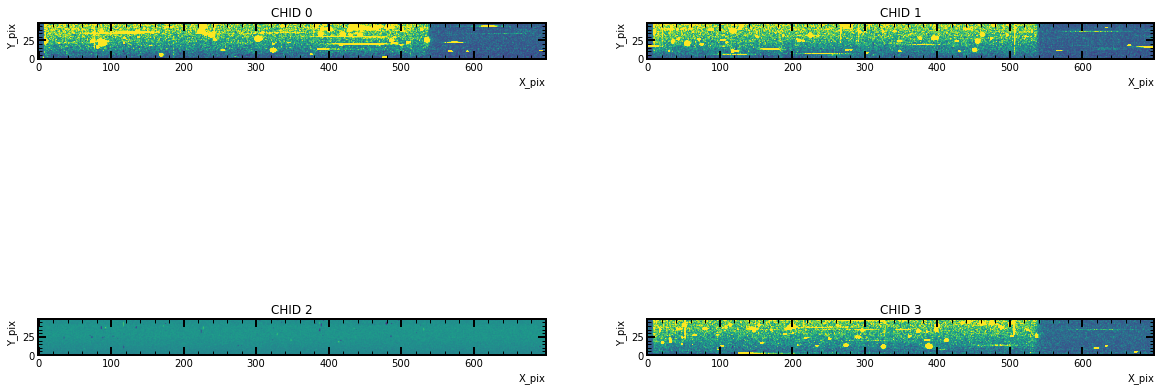

In [4]:
# path = '/home/labdet/Documents/MauSan/imagenesMicrochip/17OCT23/am241_gammas/proc_skp_m-009_microchip_T_170__Vv82_NSAMP_1_NROW_650_NCOL_700_EXPOSURE_0_NBINROW_1_NBINCOL_1_img_10.fits'
path = '/home/labdet/Documents/MauSan/imagenesMicrochip/17OCT23/am241_gammas/proc_skp_m-009_microchip_T_170__Vv82_NSAMP_324_NROW_50_NCOL_700_EXPOSURE_0_NBINROW_1_NBINCOL_1_img_690.fits'
hdu_list = fits.open(path) 
print(hdu_list.info())
print('----------------')
# hdu_list[0].header
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(hdu_list[i].data-np.median(hdu_list[i].data),vmin=-800,vmax=800)
    plt.title('CHID '+str(i))
    plt.ylabel('Y_pix')
    plt.xlabel('X_pix')
plt.show()

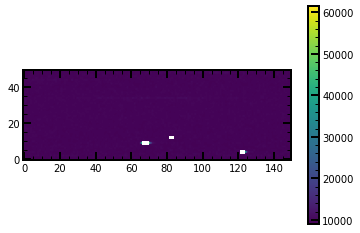

In [5]:
extension = 4
# plt.imshow(hdu_list[0].data[:, 550:], vmin = 0, vmax = 80000, origin = 'lower')
Overscan = hdu_list[extension - 1].data[:, 550:]
oScan_mask=sk.measure.label(Overscan>= np.max(Overscan) - np.mean(Overscan), connectivity=2)
oScan=ma.masked_array(Overscan,mask=(oScan_mask>0))
plt.imshow(oScan, origin='lower')
plt.colorbar()

1


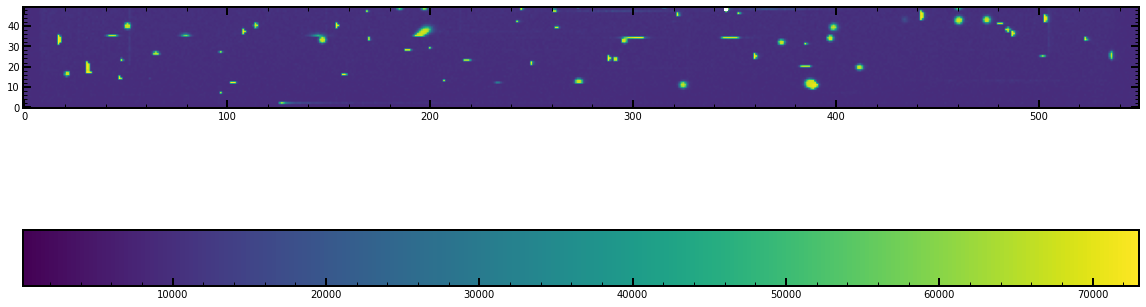

In [6]:
plt.figure(figsize=[20,15])
active_area = hdu_list[extension - 1].data[:, :550]
# active_area_mask=sk.measure.label(active_area>= 14 * np.mean(oScan.data), connectivity=2)
active_area_mask=sk.measure.label(active_area>= np.max(active_area), connectivity=2)
active_area_true=ma.masked_array(active_area,mask=(active_area_mask>0))
plt.imshow(active_area_true, origin='lower')
plt.colorbar(location = 'bottom')

print(active_area_mask.max())

In [851]:
hdu_path = path.split('_')
# int(hdu_path[15])

# Pruebas con eventos ficticios

1
[[-- -- -- -- --]
 [-- 10 10 10 --]
 [-- 10 40 10 --]
 [-- 10 10 10 --]
 [-- -- -- -- --]]
120


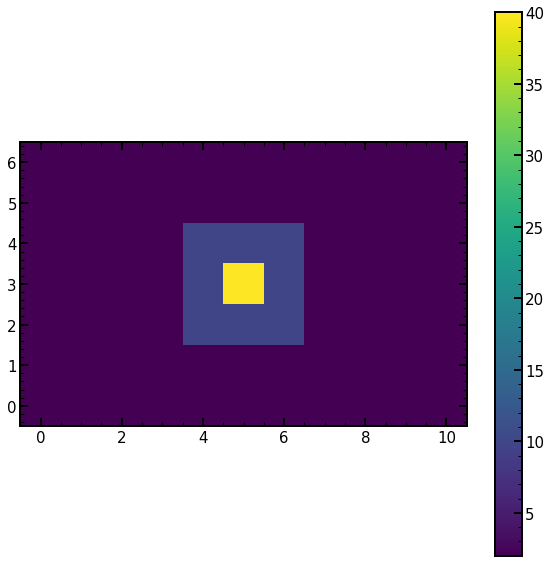

In [873]:
ficticio = np.array([[2,2,2,2,2,2,2,2,2,2,2], [2,2,2,2,2,2,2,2,2,2,2],[2,2,2,2,10,10,10,2,2,2,2],[2,2,2,2,10,40,10,2,2,2,2],[2,2,2,2,10,10,10,2,2,2,2], [2,2,2,2,2,2,2,2,2,2,2], [2,2,2,2,2,2,2,2,2,2,2]])
labelfic, n_eventsfic = ndimage.label(ficticio>2,structure=[[1,1,1],[1,1,1],[1,1,1]])
print(n_eventsfic)
# plt.figure(figsize=(10,10))
# plt.imshow(labelfic==0, cmap='gray', vmax=1,vmin=0)
locfic = ndimage.find_objects(labelfic==1)[0]
extra = 1
# print(locfic[0].start)
# print(locfic[1].stop)
# print(locfic)

# plt.imshow(ficticio[locfic[0].start-extra:locfic[0].stop+extra, locfic[1].start-extra:locfic[1].stop+extra], cmap='viridis')
mask_fict = np.invert(labelfic==1)
# print(mask_fict)

plt.figure(figsize=(10,10))
ficticio_mask = ma.masked_array(ficticio[locfic[0].start-extra:locfic[0].stop+extra, locfic[1].start-extra:locfic[1].stop+extra], mask_fict[locfic[0].start-extra:locfic[0].stop+extra, locfic[1].start-extra:locfic[1].stop+extra])

print(ficticio_mask)
plt.imshow(ficticio, cmap='viridis')
plt.colorbar()

print(ficticio_mask.sum())

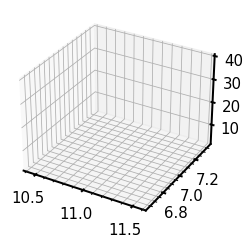

In [853]:
y, x = ficticio.shape
z = ficticio

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z)
#ax.plot_wireframe(x,y,z)
plt.show()

(900,)


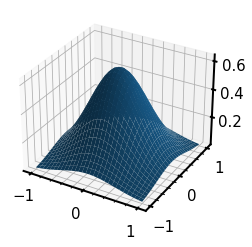

In [854]:
from scipy.stats import multivariate_normal

x, y = np.mgrid[-1.0:1.0:30j, -1.0:1.0:30j]
xy = np.column_stack([x.flat, y.flat])
# print(xy)
mu = np.array([0.0, 0.0])

sigma = np.array([.5, .5])
covariance = np.diag(sigma**2)

z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)
print(z.shape)

# Reshape back to a (30, 30) grid.
z = z.reshape(x.shape)





fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')



ax.plot_surface(x,y,z)
#ax.plot_wireframe(x,y,z)

plt.show()


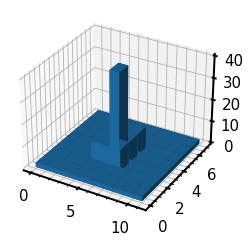

In [855]:
data_array = np.array(ficticio)
#
# Create a figure for plotting the data as a 3D histogram.
#
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#
# Create an X-Y mesh of the same dimension as the 2D data. You can
# think of this as the floor of the plot.
#
x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),
                              np.arange(data_array.shape[0]) )
#
# Flatten out the arrays so that they may be passed to "ax.bar3d".
# Basically, ax.bar3d expects three one-dimensional arrays:
# x_data, y_data, z_data. The following call boils down to picking
# one entry from each array and plotting a bar to from
# (x_data[i], y_data[i], 0) to (x_data[i], y_data[i], z_data[i]).
#
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = data_array.flatten()
ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),
          1, 1, z_data, clim = (10.0,500.0), shade = True)
#
# Finally, display the plot.
#
plt.show()

(3.0, 2.5)
Coordenada X:  2.5
Coordenada Y:  3.0


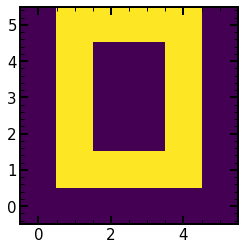

In [856]:
fict = np.array([[0,0,0,0,0,0], [0,1,1,1,1,0],[0,1,0,0,1,0],[0,1,0,0,1,0], [0,1,0,0,1,0], [0,1,1,1,1,0]])
# fict = np.array([[0,0,0,0,0,0], [0,0,0,0,0,0],[0,0,0,1,0,0],[0,0,0,0,0,0], [0,0,0,0,0,0], [0,0,0,0,0,0], [0,0,0,0,0,0]])

plt.imshow(fict)

coord = ndimage.center_of_mass(fict) # Regresa una tupla con las coordenadas (Y,X)
print(coord)
print("Coordenada X: ", coord[1] )
print("Coordenada Y: ", coord[0] ) 

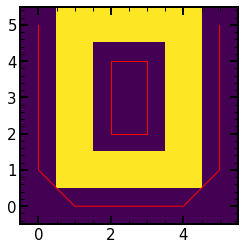

In [857]:
plt.imshow(fict)
plt.contour(fict,0,colors='red')

# Normalizando y calibrando los datos para obtener la sigmna 

Offset Value:  9473.661  ADUs
Centroide:  423.89217714725777  Amplitud:  387.2644659249651 sigma:  391.5931045270478


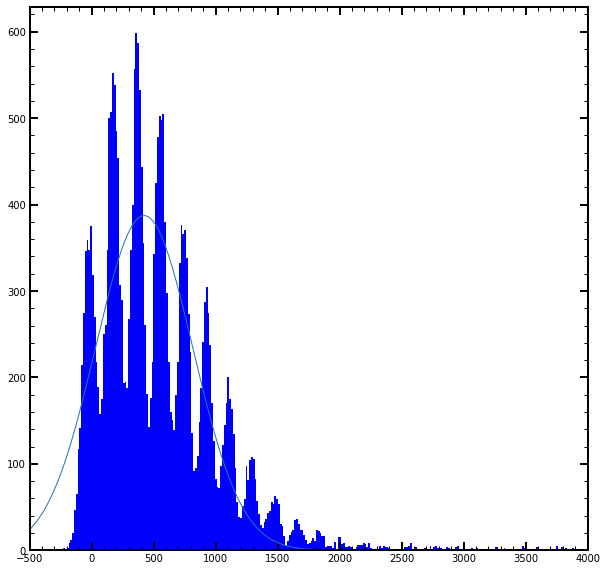

In [7]:
Bins = 5000
ratio_keV = 0.0037

data = active_area_true
header = hdu_list[extension-1].header

nsamp=float(header['NSAMP'])
expgain = [227, 220.4, 94.72, 197.7]

#Aplanar la imágen
fig_all, axs_all = plt.subplots(1, 1, figsize=(10, 10))
hist , bins_edges = np.histogram(oScan.flatten(), bins = Bins)

offset = bins_edges[np.argmax(hist)]
# offset = hist.mean()
print('Offset Value: ', offset, ' ADUs')
# data = 
dataP = data - offset
# dataCal = (ratio_keV * dataP)/expgain[extension-1] ## En keV
dataCal = dataP

bin_heights, bin_borders, _ = axs_all.hist(dataCal.flatten(), bins= Bins, color='b')#, log=True)#,  range=[-200000, 1000000])
bin_centers=np.zeros(len(bin_heights), dtype=float)
offset_fit = bin_borders[np.argmax(bin_heights)]
for p in range(len(bin_heights)):
    bin_centers[p]=(bin_borders[p+1]+bin_borders[p])/2

# xmin_fit, xmax_fit = offset_fit-(10*expgain[extension-1])/math.sqrt(nsamp), offset_fit+(10*expgain[extension-1])/math.sqrt(nsamp)			# Define fit range
xmin_fit, xmax_fit = -abs(offset), abs(offset)
bin_heights = bin_heights[(bin_centers>xmin_fit) & (bin_centers<xmax_fit)]
bin_centers = bin_centers[(bin_centers>xmin_fit) & (bin_centers<xmax_fit)]

popt, pcov = curve_fit(gaussian, bin_centers, bin_heights, maxfev=1000000, p0 = [1,1,100])		# Fit histogram with gaussian
axs_all.plot(bin_centers, gaussian(bin_centers, *popt))	


plt.xlim(-500, 4000)
# plt.ylim(0, 600)
# axs_all.set_yscale('log')
# axs_all.set_ylim(0,2)
# plt.show()

print('Centroide: ', popt[1], ' Amplitud: ', popt[0], 'sigma: ', popt[2]) #gaussian(x, a, mean, sigma)
# n_events
# print(popt)
# dataP
# print(header['RUNID'])

In [859]:
# print(data.max())
# np.median(data)

# All Events DataFrame 

In [8]:
fondo_value = 3 * abs(popt[2])
list_Runid = []
list_ext = []
list_Matrix_Slice_Event = []
list_Size_Matrix_Event = []
#Listas a mano
list_event_size = []
list_charge = []
list_mean_charge = []
list_Barycenter= []
list_Barycenter_charge = []
list_n_events = []

#Listas skmeasure
list_event_size_sk = []
list_mean_charge_sk = []
list_Barycenter_sk= []
list_Barycenter_charge_sk = []
list_n_events_sk = []

# extension = extension ## Extension's number
extra = 0
# data = hdu_list[extension-1].data
header = hdu_list[extension-1].header
Runid = str(int(header['RUNID']))

oScan=hdu_list[extension-1].data[638:,530:]
expgain = [227, 220.4, 94.72, 197.7]

hist , bins_edges = np.histogram(oScan.flatten(), bins = 1000000)
offset = bins_edges[np.argmax(hist)]
dataP = data-offset ## Datos aplanados
# dataCal = (ratio_keV * dataP)/expgain[extension-1] ## Datos normalizados en keV

# label, n_events =ndimage.label(dataCal>6*abs(popt[2]),structure=[[1,1,1],[1,1,1],[1,1,1]])
# label, n_events =ndimage.label(dataCal>6*abs(popt[2]),structure=[[1,0,1],[1,1,1],[1,0,1]])
# label, n_events =ndimage.label(dataCal>6*abs(popt[2]),structure=[[0,1,0],[1,1,1],[0,1,0]])
label_img, nlabels_img = sk.measure.label(dataCal > fondo_value, connectivity=2, return_num=True)

prop = sk.measure.regionprops(label_img,dataCal)

## Obteniendo el valor promedio del fondo
# fondo_mask = np.invert(label==0)
fondo_mask = np.invert(label_img==0)
fondo = ma.masked_array(dataCal,fondo_mask)
# print(fondo)
valor_promedio_fondo = fondo.data.mean()
# print(valor_promedio_fondo)
# plt.imshow(fondo, cmap='gray')
# plt.colorbar()


for i in range(0,nlabels_img):
    list_n_events.append(i+1)

for event in range(1, nlabels_img+1):
    mask = np.invert(label_img == event)
    loc = ndimage.find_objects(label_img == event)[0]
    
    data_maskEvent = ma.masked_array(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop],
                                         mask[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
    if len(data_maskEvent)<1:
        list_Size_Matrix_Event.append('NaN')

    else:
        ## Número de imagen
        list_Runid.append(Runid)

        ## Número de Extensión
        list_ext.append(extension)

        ## Lista de Coordenadas de cada evento
        list_Size_Matrix_Event.append(str(data_maskEvent.shape[1])+'x'+str(data_maskEvent.shape[0])) ## La dimensión de la matriz del evento en pixeles
        
        event_size = 0
        # Obtiene los pixeles que componen al evento(a mano)
        # for i in range(0,len(data_maskEvent.flatten())):
        #     if data_maskEvent.flatten()[i]:
        #         event_size = event_size+1
        # list_event_size.append(int(event_size))

        # Obtiene los pixeles que componen al evento(con skmeasure)
        # try:
        num_pixels = prop[event-1].num_pixels
        list_event_size_sk.append(num_pixels)
        # except:
        #     list_event_size_sk.append('NaN')

        # Obtiene la carga total del evento en electrones
        # charge = 0
        # for i in data_maskEvent.data.flatten():
        #     if i >= valor_promedio_fondo:
        #         charge = charge + i
        charge = data_maskEvent.sum()
        # list_charge.append(data_maskEvent.sum())
        list_charge.append(charge)

        # Carga promedio en electrones (a mano)
        # try:
        #     mean_charge = charge/event_size
        #     list_mean_charge.append(round(mean_charge,3))
        # except:
        #     # list_mean_charge.append('None Event Size')
        #     continue

        mean_ch = prop[event-1].intensity_mean
        list_mean_charge_sk.append(round(mean_ch,3))
        

        ## Baricentro (a mano)
        # centerCharge = ndimage.center_of_mass(data[1][loc])
        # coordX_centerCharge = round(ndimage.center_of_mass(data_maskEvent)[1],4)
        # coordY_centerCharge = round(ndimage.center_of_mass(data_maskEvent)[0],4)
        # list_coordCenterCharge = [coordX_centerCharge, coordY_centerCharge]
        # list_Barycenter.append(list_coordCenterCharge)
        # print(centerMass)

        ## Baricentro (con skmeasure)
        coordY_centerCharge, coordX_centerCharge = round(prop[event-1].centroid_local[0],4), round(prop[event-1].centroid_local[1],4)
        list_coordCenterCharge = [coordX_centerCharge, coordY_centerCharge]
        # print('Barycenter: ', prop[n_label-1].centroid_local)
        list_Barycenter_sk.append(list_coordCenterCharge)
        # print(centerMass)


        # ## Carga del Baricentro (a mano)
        # coordX_centerCharge = round(ndimage.center_of_mass(data_maskEvent)[1])
        # coordY_centerCharge = round(ndimage.center_of_mass(data_maskEvent)[0])
        # BarycenterChage = data_maskEvent[coordY_centerCharge, coordX_centerCharge]
        
        # if BarycenterChage:
        #     list_Barycenter_charge.append(BarycenterChage)
        # else: 
        #     list_Barycenter_charge.append('NaN')

        ## Carga del Baricentro (con skmeasure)
        BarycenterChage = prop[event-1].centroid_weighted_local
        # if BarycenterChage:
        list_Barycenter_charge_sk.append(BarycenterChage)
        # else: 
        #     list_Barycenter_charge_sk.append('NaN')
        # list_centerCharge.append(centerCharge)
        # print(list_centerCharge)

## DataFrame de Cada evento
print('Events: '+ str(list_n_events[-1]))
RunidFrame = pd.DataFrame(list_Runid, columns = ['Image ID'])
ExtensionFrame = pd.DataFrame(list_ext, columns = ['Extension'])
Event_IDFrame= pd.DataFrame(list_n_events, columns = ['Event ID'])
Matrix_Size_EventFrame = pd.DataFrame(list_Size_Matrix_Event, columns = ['Matrix Size (px)'])

# Event_SizeFrame = pd.DataFrame(list_event_size, columns = ['Event Size (px)'])
EventSK_SizeFrame = pd.DataFrame(list_event_size_sk, columns = ['Event Size SK (px)'])

ChargeFrame = pd.DataFrame(list_charge, columns = ['Total Charge (keV)'])

# MeanChargeFrame = pd.DataFrame(list_mean_charge, columns = ['Mean Charge (keV)'])
MeanChargeSKFrame = pd.DataFrame(list_mean_charge_sk, columns = ['Mean Charge SK (keV)'])


# totalFrame =pd.concat([Event_IDFrame,RunidFrame, ExtensionFrame, Matrix_Size_EventFrame, Event_SizeFrame, EventSK_SizeFrame, ChargeFrame, MeanChargeFrame, MeanChargeSKFrame], axis = 1 )
totalFrame = pd.concat([Event_IDFrame, RunidFrame, ExtensionFrame, Matrix_Size_EventFrame, EventSK_SizeFrame, ChargeFrame, MeanChargeSKFrame], axis = 1 )

# totalFrame['Barycenter (px)']=pd.Series(list_Barycenter)
totalFrame['Barycenter_SK (px)']=pd.Series(list_Barycenter_sk)

# totalFrame["Barycenter Charge (keV)"]=pd.Series(list_Barycenter_charge)
# totalFrame["Barycenter Charge SK (e-)"]=pd.Series(list_Barycenter_charge_sk)


TF = totalFrame.set_index('Event ID')
TF
# TF.query('Event Size (px) >= 200')
# totalFrame.style.hide_index()

Events: 802


,Image ID,Extension,Matrix Size (px),Event Size SK (px),Total Charge (keV),Mean Charge SK (keV),Barycenter_SK (px)
Event ID,,,,,,,
1,690,4,38x1,38,338683.437500,8912.722,"[18.5, 0.0]"
2,690,4,1x1,1,1429.891602,1429.892,"[0.0, 0.0]"
3,690,4,5x1,5,8079.455078,1615.891,"[2.0, 0.0]"
4,690,4,2x1,2,3824.684570,1912.342,"[0.5, 0.0]"
5,690,4,3x1,3,4349.056641,1449.686,"[1.0, 0.0]"
...,...,...,...,...,...,...,...
798,690,4,1x1,1,1447.527344,1447.527,"[0.0, 0.0]"
799,690,4,4x1,4,6445.750977,1611.438,"[1.5, 0.0]"
800,690,4,1x1,1,1296.884766,1296.885,"[0.0, 0.0]"


In [861]:
TF[50:70]

,Image ID,Extension,Matrix Size (px),Event Size SK (px),Total Charge (keV),Mean Charge SK (keV),Barycenter_SK (px)
Event ID,,,,,,,
51,690,4,2x1,2,3039.446289,1519.723,"[0.5, 0.0]"
52,690,4,1x1,1,1272.261719,1272.262,"[0.0, 0.0]"
53,690,4,1x1,1,1287.987305,1287.987,"[0.0, 0.0]"
54,690,4,2x2,4,175169.859375,43792.465,"[0.5, 0.5]"
55,690,4,1x1,1,5259.774414,5259.774,"[0.0, 0.0]"
56,690,4,1x1,1,1281.097656,1281.098,"[0.0, 0.0]"
57,690,4,1x1,1,1319.458984,1319.459,"[0.0, 0.0]"
58,690,4,4x4,12,311815.187500,25984.599,"[1.25, 1.3333]"
59,690,4,1x1,1,1237.987305,1237.987,"[0.0, 0.0]"


# Visualizar un evento en la imagen original, solo su "rebanada" y la "rebanada" enmascarada

Event Slice:
x: [35,36]
y: [27,28]


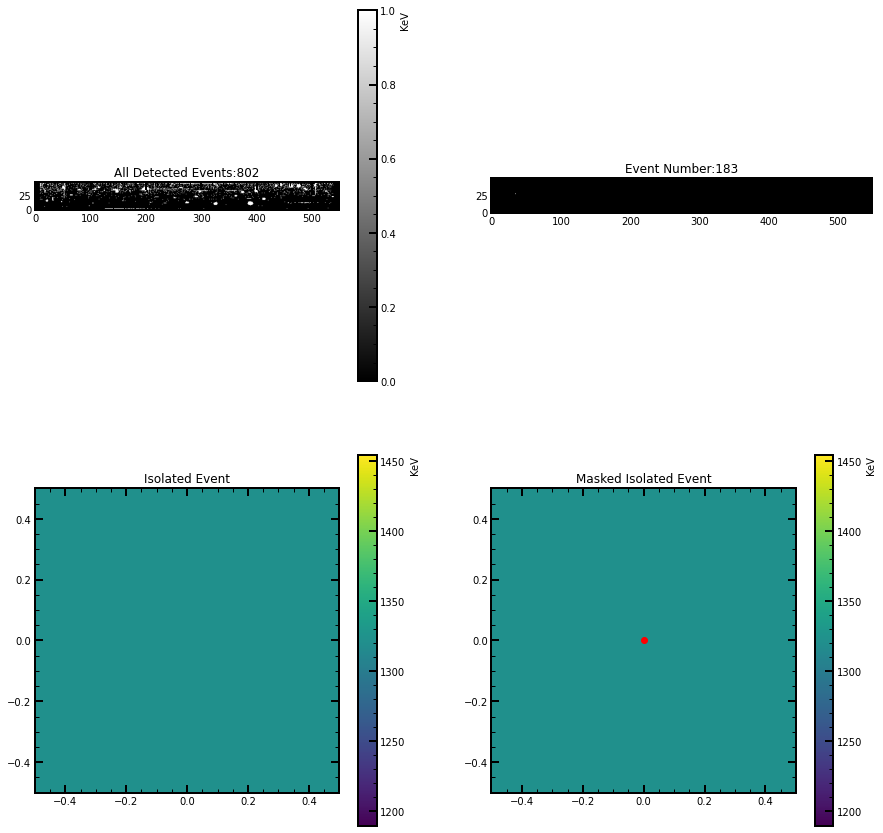

,Image ID,Extension,Matrix Size (px),Event Size SK (px),Total Charge (keV),Mean Charge SK (keV),Barycenter_SK (px)
Event ID,,,,,,,
183,690,4,1x1,1,1321.807617,1321.808,"[0.0, 0.0]"


In [9]:
n_label = 183
extra = 0
label, n_events =ndimage.label(dataCal> fondo_value,structure=[[1,1,1],[1,1,1],[1,1,1]]) # 48
# label, n_events = ndimage.label(dataCal>6*abs(popt[2]),structure=[[0,1,0],[1,1,1],[0,1,0]]) ## 50, 52

loc = ndimage.find_objects(label==n_label)[0]

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15,15))
# fig.suptitle('Event Number '+ str(n_label))
## Imagen original
axs[0,0].set_title('All Detected Events:'+str(n_events))
axs[0,0].imshow(label==0, cmap='gist_yarg', vmax = 1, vmin=0, origin='lower')
# plt.suptitle('Primer Imagen')

## Evento en la imagen original
axs[0,1].set_title('Event Number:'+str(n_label))
x0 = axs[0,1].imshow(label==n_label, cmap='gray', vmax=1,vmin=0, origin='lower')


axs[1,0].set_title('Isolated Event')
x1 = axs[1,0].imshow(dataCal[loc[0].start-extra:loc[0].stop+extra, loc[1].start-extra:loc[1].stop+extra], cmap='viridis', origin = 'lower')
# plt.colorbar()

mask_35 = np.invert(label==n_label)
data_mask = ma.masked_array(dataCal[loc[0].start-extra:loc[0].stop+extra, loc[1].start-extra:loc[1].stop+extra], mask_35[loc[0].start-extra:loc[0].stop+extra, loc[1].start-extra:loc[1].stop+extra])
axs[1,1].set_title('Masked Isolated Event')
x2 = axs[1,1].imshow(data_mask, cmap='viridis', origin='lower')
axs[1,1].plot(totalFrame.iat[n_label-1, 7][0], totalFrame.iat[n_label-1, 7][1], 'ro') ## Plot the baricentrum
# print('n_label-1:', n_label-1)
# plt.legend('Baricentrum')

x0bar = fig.colorbar(x0, ax=axs[0,0])
x1bar = fig.colorbar(x1, ax=axs[1,0])
x2bar = fig.colorbar(x2, ax=axs[1,1])

x0bar.set_label('KeV')
x1bar.set_label('KeV')
x2bar.set_label('KeV')
# fig.colorbar(axs[1,1], ax=[[x1,x2]], location = 'bottom', fraction = .1)

print('Event Slice:'  )
print('x: ['+str(loc[1].start)+','+str(loc[1].stop)+']')
print('y: ['+str(loc[0].start)+','+str(loc[0].stop)+']')
# print(loc)
# print(totalFrame.set_index('Event ID').iloc[[n_label-1]])
plt.show()
totalFrame.set_index('Event ID').iloc[[n_label-1]]

## Utilizando la libreria 'skimage.measure'

Centroide:  (2.0, 169.0)
Axis major length:  5.656854249492381
Axis minor length:  0.0
Box:  (2, 167, 3, 172)
Centroid Weighted:  (2.0, 168.843519841148)
Label:  3
Orientation:  1.5707963267948966
Slice:  (slice(2, 3, None), slice(167, 172, None))
Eccentricity:  1.0
Solidity:  1.0
Barycenter:  [0. 2.]


Event Charge:  8079.455  keV
Local Box:  [5, 1]  px
Local Box:  [75, 15] micras
Diagonal Lenght:  3.6848059512196896  px
Diagonal Lenght:  55.272089268295346  micras
Delta_L:  725.0093639360102  px
Delta_L:  10875.140459040154  micras
Delta EL:  11.143932037322068  keV/px
Delta EL:  0.7429288024881379  keV/micras
Delta EL:  111439.32037322067  keV/cm


(166.0, 173.0, 1.0, 4.0)

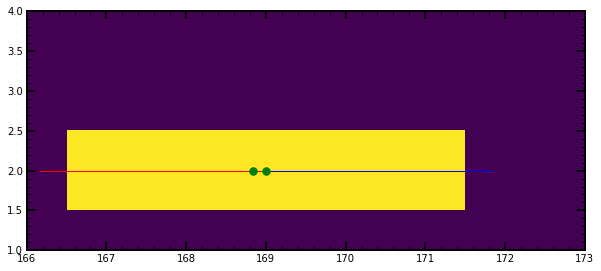

In [10]:
n_label= 3
CCD_depth = 725 ## micras
px_to_micras = 15 ## micras
px_to_cm = 0.0015 ## cm/px
micra_to_cm = 1 / 10000 ## micras/cm
fig, ax = plt.subplots(figsize=(10,10))

label_img, nlabels_img = sk.measure.label(dataCal > fondo_value, connectivity=2, return_num=True)
# print(nlabels_img)
ax.imshow(label_img==n_label) # Matriz centrada en el origen

prop = sk.measure.regionprops(label_img, dataCal)
# prop = sk.measure.regionprops(label_img)

# loc = ndimage.find_objects(label==n_label)[0]
loc = prop[n_label-1].slice

mask_35 = np.invert(label_img==n_label)
# ax.imshow(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])

data_mask = ma.masked_array(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
charge = data_mask.sum()
# plt.imshow(dataCal[maxim.start:maxim.stop])
# ax.imshow(data_mask)


print("Centroide: ", prop[n_label-1].centroid)
print("Axis major length: ", prop[n_label-1].axis_major_length)
print("Axis minor length: ", prop[n_label-1].axis_minor_length)
print("Box: ", prop[n_label-1].bbox)
# print("Centroide Local: ", prop[n_label-1].centroid_local)
print('Centroid Weighted: ', prop[n_label-1].centroid_weighted)
# print(prop[n_label-1].centroid_weighted_local)
# print(prop[n_label-1].coords_scaled)
# print(prop[n_label-1].coords)
# print(prop[n_label-1].extent)
# print(prop[n_label-1].image)
# print(prop[n_label-1].image_intensity)
print('Label: ', prop[n_label-1].label)
print('Orientation: ', prop[n_label-1].orientation)
print('Slice: ', prop[n_label-1].slice)
print('Eccentricity: ', prop[n_label-1].eccentricity)
print('Solidity: ', prop[n_label-1].solidity)
print('Barycenter: ', prop[n_label-1].centroid_local)
# print('Inertia tensor: ', prop[n_label-1].inertia_tensor)
# print('Intensity Max: ', prop[n_label-1].intensity_max)

print('\n')
## Ellipse 
y0, x0 = prop[n_label-1].centroid
# y0, x0 = prop[n_label-1].centroid_weighted

orientation = prop[n_label-1].orientation
rotation = orientation*1
x1 = x0 + math.cos(orientation) * 0.5 * prop[n_label-1].axis_minor_length
y1 = y0 - math.sin(orientation) * 0.5 * prop[n_label-1].axis_minor_length

x2 = x0 - math.sin(orientation) * 0.5 * prop[n_label-1].axis_major_length
y2 = y0 - math.cos(orientation) * 0.5 * prop[n_label-1].axis_major_length # Ellipse's major radio

x3 = x0 - math.sin(-orientation) * 0.5 * prop[n_label-1].axis_major_length
y3 = y0 + math.cos(orientation) * 0.5 * prop[n_label-1].axis_major_length # Ellipse's major radio


ax.plot((x0, x1), (y0, y1), 'r', linewidth=1)
ax.plot((x0, x3), (y0, y3), 'b', linewidth=1)
ax.plot((x0, x2), (y0, y2), 'r', linewidth=1)

ax.plot(x0, y0, '.g', markersize=15) # Ellipse's center
ax.plot(prop[n_label-1].centroid_weighted[1], prop[n_label-1].centroid_weighted[0], '.g', markersize=15)

## Box and Delta_L
miny, minx, maxy, maxx = prop[n_label-1].bbox
Longitud_y = maxy - miny # px
Longitud_x = maxx - minx # px
Diagonal_lenght= np.sqrt(Longitud_x**2 + Longitud_y**2) - np.sqrt(2) # px
Delta_L = np.sqrt(Diagonal_lenght**2 + CCD_depth**2) # px
DeltaEL = charge / Delta_L # keV/px

print('Event Charge: ', charge, ' keV')
print("Local Box: ", [Longitud_x, Longitud_y], ' px' )
print("Local Box: ", [Longitud_x * px_to_micras, Longitud_y * px_to_micras], 'micras' )
print('Diagonal Lenght: ', Diagonal_lenght, ' px') ## px
print('Diagonal Lenght: ', Diagonal_lenght * px_to_micras, ' micras')
print('Delta_L: ', Delta_L, ' px')
print('Delta_L: ', Delta_L * px_to_micras, ' micras')
print('Delta EL: ', DeltaEL, ' keV/px')
print('Delta EL: ', DeltaEL / px_to_micras, ' keV/micras')
print('Delta EL: ', DeltaEL / micra_to_cm, ' keV/cm')
bx = (minx, maxx, maxx, minx, minx)
by = (miny, miny, maxy, maxy, miny)
# ax.plot(bx, by, '-b', linewidth=2.5)


# rect = mpl.mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
# ax.add_patch(rect)


# excent = prop[n_label-1].eccentricity
u= x0   #x-position of the center
v= y0    #y-position of the center
b = prop[n_label-1].axis_major_length    #radius on the x-axis
a = prop[n_label-1].axis_minor_length   #radius on the y-axis

# t = np.linspace(0, 2*np.pi, 100)
# origianl_x, original_y = u+a*np.cos(t) , v+b*np.sin(t)
# rotate_x, rotate_y = u + a * np.cos(t) * np.cos(rotation) - b * np.sin(t) * np.sin(rotation), v + b * np.sin(t) * np.cos(rotation) + a * np.cos(t) * np.sin(rotation)


# # el = Ellipse((x0, y0), hradius = a, vradius = b)
# img = np.zeros((700, 700), dtype=float)
# ellip0, ellip1 = sk.draw.ellipse_perimeter(int(x0), int(y0), int(a), int(b), int(orientation))
# img[ellip0, ellip1] = 1
# plt.plot(img, 'ro')


# print('Tipo: ', type(a), float(a))
# plt.plot(rotate_x,rotate_y)
# plt.plot(origianl_x,original_y)
# plt.plot(el)

ext=1
ax.axis((loc[1].start-ext, loc[1].stop+ext, loc[0].start-ext, loc[0].stop+ext))
# ax.imshow(data_mask)
# ax.can_zoom()


## Filtro de Gammas del Am-241

In [11]:
## Calcula cuantos eventos circulares tiene la extensión comparando la relación del radio mayor de la elipse con el radio menor
Gammas_Events = []

for event in range(1, nlabels_img):
    mask = np.invert(label_img == event)
    loc = ndimage.find_objects(label_img == event)[0]
    
    data_maskEvent = ma.masked_array(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop],
                                         mask[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])

    coordX_centerCharge = round(ndimage.center_of_mass(data_maskEvent)[1])
    coordY_centerCharge = round(ndimage.center_of_mass(data_maskEvent)[0])

    # MaxValue_Event = data_maskEvent.max()
    MinValue_Event = data_maskEvent.min()
    MeanValue_Event = data_maskEvent.mean()
    # MeanValue_Event = (MaxValue_Event - MinValue_Event)/2
    Barycentercharge = data_maskEvent[coordY_centerCharge, coordX_centerCharge]
    try:
        differval = abs(Barycentercharge - MinValue_Event) 
    except:
        differval = 0 

    rM = prop[event-1].axis_major_length
    rm = prop[event-1].axis_minor_length
    Solidity = prop[event-1].solidity
    charge = data_maskEvent.sum()
    miny, minx, maxy, maxx = prop[event-1].bbox
    Long_y = maxy - miny
    Long_x = maxx - minx 

    if Long_x < 4 or Long_y < 4 :
        continue

    if differval < MeanValue_Event:
        continue

    if Solidity < 0.8:
        continue 

    if  rM <= 1.5 * rm:
        # print(Barycentercharge, differval)
        Gammas_Events.append(event)

print('Straight Events Detected: ', len(Gammas_Events))
print(Gammas_Events)
# print(type(data_maskEvent))

Straight Events Detected:  5
[27, 28, 58, 77, 133]


In [13]:
charge_Gammas_Events = []
for index_event in range(0,len(Gammas_Events)):
    mask = np.invert(label_img == Gammas_Events[index_event])
    loc = ndimage.find_objects(label_img == Gammas_Events[index_event])[0]
    
    data_maskEvent = ma.masked_array(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop],
                                         mask[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])

    charge = data_maskEvent.sum() # KeV
    # print(charge)
    # if charge < 6000:
    charge_Gammas_Events.append(charge)
    # miny, minx, maxy, maxx = prop[Gammas_Events[index_event]-1].bbox
    # Longitud_y = maxy - miny # px
    # Longitud_x = maxx - minx # px
    # Diagonal_lenght= np.sqrt(Longitud_x**2 + Longitud_y**2) - np.sqrt(2) # px
    # Delta_L = np.sqrt( (Diagonal_lenght * px_to_micras)**2 + (CCD_depth)**2) * micra_to_cm # cm
    # DeltaEL_KeV= charge / (Delta_L) # keV/cm
    # DeltaEL_MeV=  DeltaEL_KeV/1000 # MeV/cm
    # theta = np.arctan((Diagonal_lenght * px_to_cm)/(CCD_depth * micra_to_cm)) *(180 /np.pi)

    # list_diagonal_lenght.append(Diagonal_lenght * px_to_cm)
    # list_dl.append(Delta_L)
    # list_charge.append(charge / 1000)
    # list_dedl.append(DeltaEL_MeV)
    # list_angle.append(theta)
    # print(Straight_Events[index_event], str(DeltaEL_GeV) + ' GeV/cm')
    # print( Straight_Events[index_event], Delta_L, DeltaEL_MeV, charge, theta)


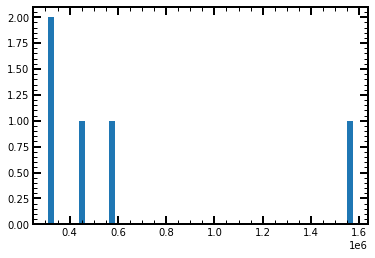

In [14]:
plt.hist(charge_Gammas_Events, bins = 50)
# plt.yscale('log')
# plt.xlim(0,3000)
plt.show()

In [867]:
## DataFrame de los eventos circulares
for n_label in Gammas_Events:
    # print(n_label)
    display(totalFrame.set_index('Event ID').iloc[[n_label-1]])

,Image ID,Extension,Matrix Size (px),Event Size SK (px),Total Charge (keV),Mean Charge SK (keV),Barycenter_SK (px)
Event ID,,,,,,,
27,690,4,11x8,56,1572718.0,28084.248,"[4.8929, 3.5893]"


,Image ID,Extension,Matrix Size (px),Event Size SK (px),Total Charge (keV),Mean Charge SK (keV),Barycenter_SK (px)
Event ID,,,,,,,
28,690,4,8x6,32,568383.0,17761.969,"[3.25, 2.0625]"


,Image ID,Extension,Matrix Size (px),Event Size SK (px),Total Charge (keV),Mean Charge SK (keV),Barycenter_SK (px)
Event ID,,,,,,,
58,690,4,4x4,12,311815.1875,25984.599,"[1.25, 1.3333]"


,Image ID,Extension,Matrix Size (px),Event Size SK (px),Total Charge (keV),Mean Charge SK (keV),Barycenter_SK (px)
Event ID,,,,,,,
77,690,4,6x4,22,458177.375,20826.244,"[2.2727, 1.5]"


,Image ID,Extension,Matrix Size (px),Event Size SK (px),Total Charge (keV),Mean Charge SK (keV),Barycenter_SK (px)
Event ID,,,,,,,
133,690,4,5x6,22,324834.4375,14765.202,"[2.3182, 2.6364]"


In [868]:
# label_img, nlabels_img = sk.measure.label(dataCal>6*popt[2], connectivity=2, return_num=True)
# # print(nlabels_img)
# prop = sk.measure.regionprops(label_img,dataCal)

# for n_label in Gammas_Events:
#     print(n_label, prop[n_label-1].solidity)

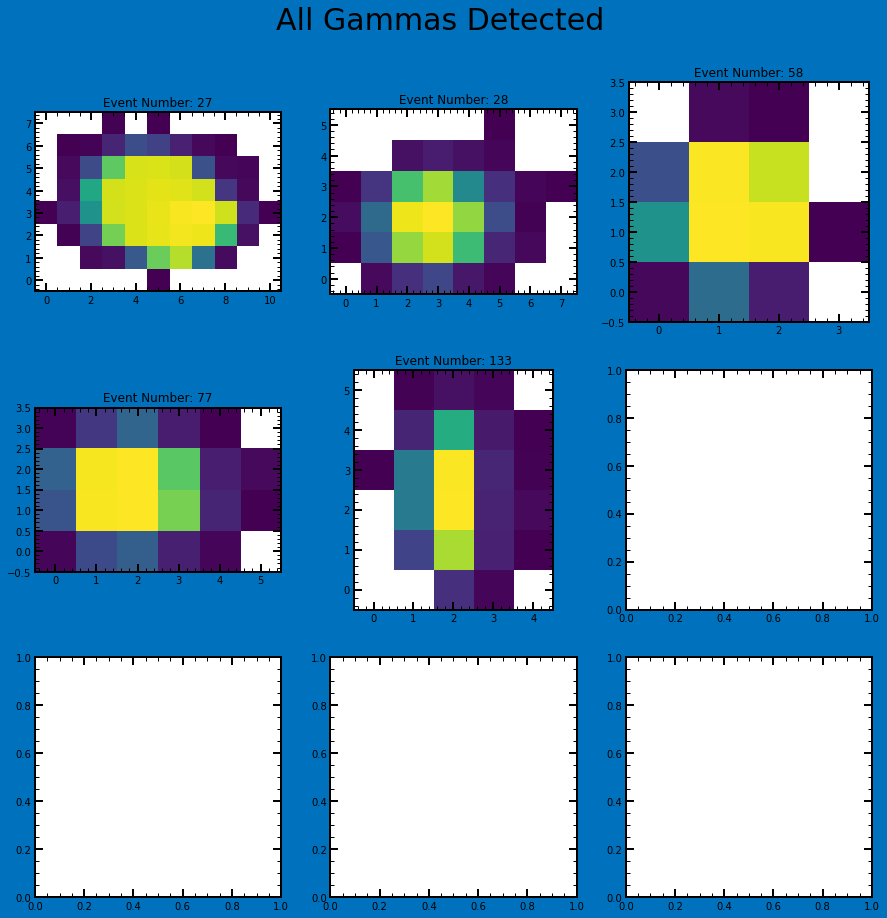

In [16]:
## Visualizar en una matriz los eventos rectos detectados 
coord2x2 = [[0,0],[0,1], [1,0], [1,1]]

coord3x3 = [[0,0],[0,1], [0,2], [1,0], [1,1], [1,2], [2,0], [2,1], [2,2]]

coord4x4 = [[0,0],[0,1], [0,2], [0,3], [1,0], [1,1], [1,2], [1,3], [2,0], [2,1], [2,2], [2,3], [3,0], [3,1], [3,2], [3,3]]

coords5x5 = [[0,0],[0,1], [0,2], [0,3], [0,4], [1,0], [1,1], [1,2], [1,3], [1,4], [2,0], [2,1], [2,2], [2,3], [2,4], [3,0], [3,1], [3,2], [3,3], [3,4],[4,0], [4,1], [4,2], [4,3], [4,4]]

if len(Gammas_Events) < 5:
    fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize=(10,10), facecolor = [0, 0.4470, 0.7410])
    fig.suptitle('All Gammas Detected', y = 0.95, size = 20)

    for index_event in range(0,len(Gammas_Events)):
        loc = ndimage.find_objects(label_img == Gammas_Events[index_event])[0]
        mask_35 = np.invert(label_img == Gammas_Events[index_event])
        data_mask = ma.masked_array(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        # plt.imshow(dataCal[maxim.start:maxim.stop])
        # ax.imshow(data_mask)

        axs[coord2x2[index_event][0],coord2x2[index_event][1]].set_title('Event Number: '+ str(Gammas_Events[index_event]))
        # axs[coord2x2[index_event][0],coord2x2[index_event][1]].imshow(label_img == Straight_Events[index_event]) ## All image
        # axs[coord2x2[index_event][0],coord2x2[index_event][1]].imshow(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop]) ## Event without mask
        axs[coord2x2[index_event][0],coord2x2[index_event][1]].imshow(data_mask) ## Event with mask

elif len(Gammas_Events) > 4 and len(Gammas_Events) < 10:
    fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize=(15,15), facecolor = [0, 0.4470, 0.7410])
    fig.suptitle('All Gammas Detected', y = 0.95, size = 30)

    for index_event in range(0,len(Gammas_Events)):
        loc = ndimage.find_objects(label_img == Gammas_Events[index_event])[0]
        mask_35 = np.invert(label_img == Gammas_Events[index_event])
        data_mask = ma.masked_array(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        # plt.imshow(dataCal[maxim.start:maxim.stop])
        # ax.imshow(data_mask)

        axs[coord3x3[index_event][0],coord3x3[index_event][1]].set_title('Event Number: '+ str(Gammas_Events[index_event]))
        # axs[coord3x3[index_event][0],coord3x3[index_event][1]].imshow(label_img == Straight_Events[index_event]) ## All image
        # axs[coord3x3[index_event][0],coord3x3[index_event][1]].imshow(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop]) ## Event without mask
        axs[coord3x3[index_event][0],coord3x3[index_event][1]].imshow(data_mask) ## Event with mask

elif len(Gammas_Events) > 9 and len(Gammas_Events) < 17:
    fig, axs = plt.subplots(ncols = 4, nrows = 4, figsize=(15,15), facecolor = [0, 0.4470, 0.7410])
    fig.suptitle('All Gammas Detected', y = 0.95, size = 20)

    for index_event in range(0,len(Gammas_Events)):
        loc = ndimage.find_objects(label_img == Gammas_Events[index_event])[0]
        mask_35 = np.invert(label_img == Gammas_Events[index_event])
        data_mask = ma.masked_array(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])

        coordX_centerCharge = round(ndimage.center_of_mass(data_maskEvent)[1])
        coordY_centerCharge = round(ndimage.center_of_mass(data_maskEvent)[0])
        Barycentercharge = data_maskEvent[coordY_centerCharge, coordX_centerCharge]

        axs[coord4x4[index_event][0],coord4x4[index_event][1]].set_title('Event Number: '+ str(Gammas_Events[index_event]))
        # axs[coord4x4[index_event][0],coord4x4[index_event][1]].imshow(label_img == Straight_Events[index_event]) ## All image
        # axs[coord4x4[index_event][0],coord4x4[index_event][1]].imshow(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop]) ## Event without mask
        axs[coord4x4[index_event][0],coord4x4[index_event][1]].imshow(data_mask) ## Event with mask
        # axs[coord4x4[index_event][0],coord4x4[index_event][1]].imshow(BarycenterChage)

elif len(Gammas_Events) > 16 and len(Gammas_Events) < 25:
    fig, axs = plt.subplots(ncols = 5, nrows = 5, figsize=(15,15), facecolor = [0, 0.4470, 0.7410])
    fig.suptitle('All Gammas Detected', y = 0.95, size = 20)

    for index_event in range(0,len(Gammas_Events)):
        loc = ndimage.find_objects(label_img == Gammas_Events[index_event])[0]
        mask_35 = np.invert(label_img == Gammas_Events[index_event])
        data_mask = ma.masked_array(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        # plt.imshow(dataCal[maxim.start:maxim.stop])
        # ax.imshow(data_mask)        

        axs[coords5x5[index_event][0],coords5x5[index_event][1]].set_title('Event Number: '+ str(Gammas_Events[index_event]))
        # axs[coords5x5[index_event][0],coords5x5[index_event][1]].imshow(label_img == Gammas_Events[index_event])
        # axs[coords5x5[index_event][0],coords5x5[index_event][1]].imshow(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop]) ## Event without mask
        axs[coords5x5[index_event][0],coords5x5[index_event][1]].imshow(data_mask) ## Event with mask

elif len(Gammas_Events) > 25:
    muestra_Gammas_Events = random.sample(Gammas_Events, 25)
    fig, axs = plt.subplots(ncols = 5, nrows = 5, figsize=(15,15), facecolor = [0, 0.4470, 0.7410])
    fig.suptitle('Sample of Gammas Detected', y = 0.95, size = 20)

    for index_event in range(0,len(muestra_Gammas_Events)):
        loc = ndimage.find_objects(label_img == muestra_Gammas_Events[index_event])[0]
        mask_35 = np.invert(label_img == muestra_Gammas_Events[index_event])
        data_mask = ma.masked_array(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        # plt.imshow(dataCal[maxim.start:maxim.stop])
        # ax.imshow(data_mask)        

        axs[coords5x5[index_event][0],coords5x5[index_event][1]].set_title('Event Number: '+ str(muestra_Gammas_Events[index_event]))
        # axs[coords5x5[index_event][0],coords5x5[index_event][1]].imshow(label_img == muestra_Gammas_Events[index_event])
        # axs[coords5x5[index_event][0],coords5x5[index_event][1]].imshow(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop]) ## Event without mask
        axs[coords5x5[index_event][0],coords5x5[index_event][1]].imshow(data_mask) ## Event with mask
    

